В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [4]:
import numpy as np

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
z = np.array([-2, -1, 0, 1, 2])

In [7]:
sigmoid(z)

array([0.11920292, 0.26894142, 0.5       , 0.73105858, 0.88079708])

In [8]:
for i in z:
    print(f"sigmoid({i}) = {sigmoid(i)}")

sigmoid(-2) = 0.11920292202211755
sigmoid(-1) = 0.2689414213699951
sigmoid(0) = 0.5
sigmoid(1) = 0.7310585786300049
sigmoid(2) = 0.8807970779778823




#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


In [9]:
def hypothesis(theta, X):
    z = np.dot(X, theta.T)
    return sigmoid(z)

In [10]:
theta = np.array([0.5, -0.5])

X = np.array([
    [1, 2],
    [1, -1],
    [1, 0],
    [1, 1]
])
theta.shape, X.shape

((2,), (4, 2))

In [11]:
hypothesis(theta, X)

array([0.37754067, 0.73105858, 0.62245933, 0.5       ])

#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [12]:
def compute_gradient(theta, X, y):
    m = len(y)
    error = hypothesis(theta, X) - y
    return np.dot(X.T, error) / m

In [13]:
theta = np.array([0.5, -0.5])
X = np.array([[1, 2],
              [1, -1],
              [1, 0],
              [1, 1]
             ])
y = np.array([1, 0, 1, 0])

In [14]:
print(f"Градієнт: {compute_gradient(theta, X, y)}")

Градієнт: [ 0.05776464 -0.36899431]



#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


In [15]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m = len(y)
    n = X.shape[1]
    theta = np.zeros(n)
    cost_history = []
    for _ in range(epochs):
        hypothes = hypothesis(theta, X)
        cost = -np.mean((y * np.log(hypothes) + (1 - y) * np.log(1 - hypothes)))
        cost_history.append(cost) # додаємо в історію
        gradient = compute_gradient(theta, X, y)

        # Оновлюємо ваги (крок градієнтного спуску)
        theta = theta - lr * gradient
    return theta, cost, cost_history

In [16]:
theta, cost, cost_history = full_batch_gradient_descent(X, y, lr=0.1, epochs=100)

In [17]:
print(f"Коефіцієнти моделі: {theta}")
print(f"Loss = {cost}")

Коефіцієнти моделі: [-0.2893693   0.77655125]
Loss = 0.5898884300233092


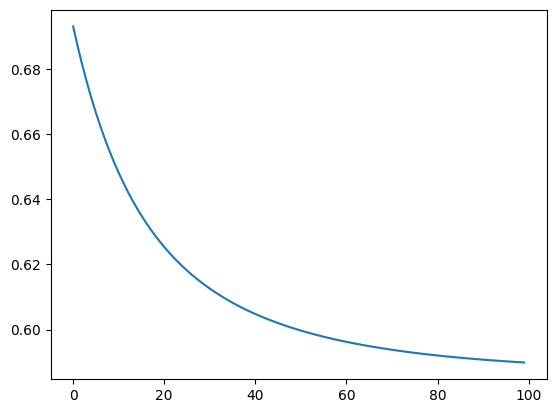

In [18]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.show()

#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [19]:
def predict_proba(theta, X):
    return hypothesis(theta, X)

def predict(theta, X, threshold=0.5):
    return np.where(predict_proba(theta, X) > threshold, 1, 0)

def accuracy(y_true, y_predict):
    return np.mean(y_true == y_predict)

In [21]:
theta_new, _, _ = full_batch_gradient_descent(X, y, lr=0.1, epochs=100)
theta_new

array([-0.2893693 ,  0.77655125])

In [ ]:
y_predict_proba = predict_proba(theta_new, X)
print(f"Передбачені моделлю імовірності належності кожного з екземплярів в матриці X до класу 1: {y_predict_proba.round(4)}")

In [123]:
print(f"y: {y}")
theta_new, _, _ = full_batch_gradient_descent(X, y, lr=0.1, epochs=100)

y_predict_proba = predict_proba(theta_new, X)
print(f"Передбачені моделлю імовірності належності кожного з екземплярів в матриці X до класу 1: {y_predict_proba.round(4)}")

y_predict = predict(theta_new, X)
print(f"Classes of each instance in the matrix X: {y_predict}")

acc = accuracy(y, y_predict)
print(f"Accuracy of the model: {acc}")

y: [1 0 1 0]
Predicted probabilities of each instance in the matrix X belonging to class 1: [0.7797 0.2562 0.4282 0.6194]
Classes of each instance in the matrix X: [1 0 0 1]
Accuracy of the model: 0.5
